In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_puntas = pd.read_csv('puntas2025.csv')
df_puntas['Marca'] = df_puntas['Marca'].replace('CAT 539-5692', 'CAT 539-5652-01')

# Ordenar por rendimiento promedio
order = df_puntas.groupby('Marca')['Rendimiento'].mean().sort_values(ascending=False)
order


Marca
CTP 138-6451       286.600
CAT 597-6133       201.176
CAT 539-5652-01    132.324
Name: Rendimiento, dtype: float64

C:\Users\PC01\AppData\Local\Temp\ipykernel_103048\896230370.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


([0, 1, 2],
 [Text(0, 0, 'CTP 138-6451'),
  Text(1, 0, 'CAT 597-6133'),
  Text(2, 0, 'CAT 539-5652-01')])

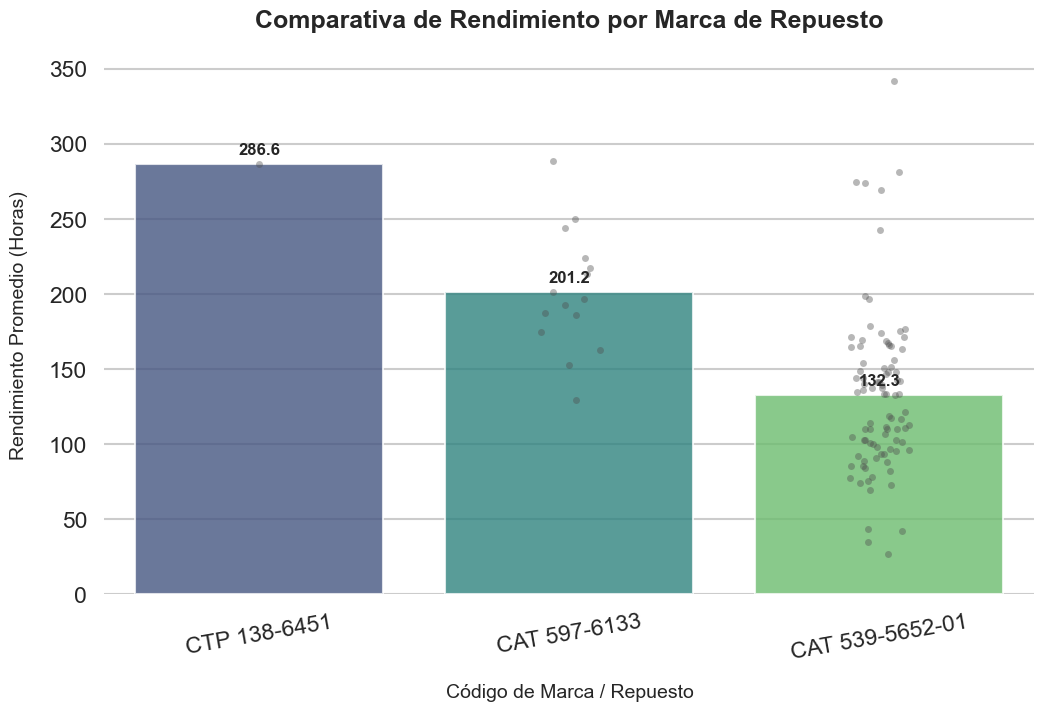

In [6]:
# 1. Preparación y Limpieza (Paso Crucial)
# Reemplazamos la marca duplicada
df_puntas['Marca'] = df_puntas['Marca'].replace('CAT 539-5692', 'CAT 539-5652-01')

# Ordenamos por rendimiento promedio para facilitar la lectura
order = df_puntas.groupby('Marca')['Rendimiento'].mean().sort_values(ascending=False).index

# 2. Configuración Estética
sns.set_theme(style="whitegrid", context="talk") 
plt.figure(figsize=(12, 7))

# 3. Creación del Gráfico
ax = sns.barplot(
    data=df_puntas, x='Marca', y='Rendimiento', 
    palette='viridis', errorbar=None, order=order, alpha=0.8
)

# Añadimos los puntos individuales (Stripplot) con transparencia para ver la densidad
sns.stripplot(
    data=df_puntas, x='Marca', y='Rendimiento', 
    color='0.3', alpha=0.4, ax=ax, order=order, jitter=True
)

# 4. Etiquetas de Datos Profesionales
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=5, weight='bold', fontsize=12)

# 5. Detalles Finales (Títulos y Ejes)
sns.despine(left=True, bottom=True)
plt.title('Comparativa de Rendimiento por Marca de Repuesto', fontsize=18, pad=20, weight='bold')
plt.xlabel('Código de Marca / Repuesto', fontsize=14, labelpad=15)
plt.ylabel('Rendimiento Promedio (Horas)', fontsize=14, labelpad=15)
plt.xticks(rotation=10)

In [7]:
print(df_puntas.isnull().sum)

<bound method DataFrame.sum of      Equipo  Fecha_Inicial  Fecha_Final  Horometro_Inicial  Horometro_Final  \
0     False          False        False              False            False   
1     False          False        False              False            False   
2     False          False        False              False            False   
3     False          False        False              False            False   
4     False          False        False              False            False   
..      ...            ...          ...                ...              ...   
102   False          False        False              False            False   
103   False          False        False              False            False   
104   False          False        False              False            False   
105   False          False        False              False            False   
106   False          False        False              False            False   

     Rendimiento  Ma

In [8]:
df_puntas = df_puntas.dropna()
df_puntas.head()

,Equipo,Fecha_Inicial,Fecha_Final,Horometro_Inicial,Horometro_Final,Rendimiento,Marca,Costos_Hora
0,CQ-EXC-01,2025-05-12,2025-06-05,1016.8,1203.7,186.9,CAT 597-6133,7.722204
1,CQ-EXC-01,2025-06-05,2025-06-30,1203.7,1400.4,196.7,CAT 597-6133,7.337468
2,CQ-EXC-01,2025-06-30,2025-07-24,1400.4,1650.4,250.0,CAT 597-6133,5.773120
3,CQ-EXC-01,2025-07-24,2025-08-01,1650.4,1779.4,129.0,CAT 597-6133,11.188217
4,CQ-EXC-01,2025-08-01,2025-08-27,1779.4,2067.8,288.4,CAT 597-6133,5.004438


In [11]:
promedio_costo = df_puntas['Costos_Hora'].mean()
promedio_costo

np.float64(3.010111448704762)

In [13]:
df_puntas['Marca'] = df_puntas['Marca'].replace('N/A', np.nan)
df_puntas.dropna(subset=['Marca'], inplace=True)
df_puntas

,Equipo,Fecha_Inicial,Fecha_Final,Horometro_Inicial,Horometro_Final,Rendimiento,Marca,Costos_Hora
0,CQ-EXC-01,2025-05-12,2025-06-05,1016.8,1203.7,186.9,CAT 597-6133,7.722204
1,CQ-EXC-01,2025-06-05,2025-06-30,1203.7,1400.4,196.7,CAT 597-6133,7.337468
2,CQ-EXC-01,2025-06-30,2025-07-24,1400.4,1650.4,250.0,CAT 597-6133,5.773120
3,CQ-EXC-01,2025-07-24,2025-08-01,1650.4,1779.4,129.0,CAT 597-6133,11.188217
4,CQ-EXC-01,2025-08-01,2025-08-27,1779.4,2067.8,288.4,CAT 597-6133,5.004438
...,...,...,...,...,...,...,...,...
102,CQ-EXC-10,2025-08-27,2025-10-06,1485.5,1683.7,198.2,CAT 539-5652-01,1.261352
103,CQ-EXC-10,2025-10-06,2025-10-29,1683.7,1859.2,175.5,CAT 539-5652-01,1.424501
104,CQ-EXC-10,2025-10-29,2025-12-03,1859.2,2000.6,141.4,CAT 539-5652-01,1.768034
105,CQ-EXC-10,2025-12-03,2025-12-12,2000.6,2093.9,93.3,CAT 539-5652-01,2.679528


In [15]:
df_puntas[df_puntas['Equipo'] == 'CQ-EXC-09']

,Equipo,Fecha_Inicial,Fecha_Final,Horometro_Inicial,Horometro_Final,Rendimiento,Marca,Costos_Hora
77,CQ-EXC-09,2025-05-23,2025-06-01,10421.9,10518.8,96.9,CAT 539-5652-01,2.579979
78,CQ-EXC-09,2025-06-01,2025-06-14,10518.8,10619.7,100.9,CAT 539-5652-01,2.477701
79,CQ-EXC-09,2025-06-14,2025-07-04,10619.7,10767.6,147.9,CAT 539-5652-01,1.690331
80,CQ-EXC-09,2025-07-04,2025-07-12,10767.6,10857.9,90.3,CAT 539-5652-01,2.768549
81,CQ-EXC-09,2025-07-12,2025-07-22,10857.9,10962.8,104.9,CAT 539-5652-01,2.383222
83,CQ-EXC-09,2025-07-29,2025-07-31,11061.5,11103.7,42.2,CAT 539-5652-01,5.924171
84,CQ-EXC-09,2025-07-31,2025-08-08,11103.7,11180.8,77.1,CAT 539-5652-01,3.242542
85,CQ-EXC-09,2025-08-08,2025-08-19,11180.8,11328.4,147.6,CAT 539-5652-01,1.693767
86,CQ-EXC-09,2025-08-19,2025-09-10,11328.4,11570.8,242.4,CAT 539-5652-01,1.031353
87,CQ-EXC-09,2025-09-10,2025-09-29,11570.8,11735.9,165.1,CAT 539-5652-01,1.514234


In [19]:
df_puntas['Fecha_Inicial'] = pd.to_datetime(df_puntas['Fecha_Inicial'])
df_puntas['Fecha_Final'] = pd.to_datetime(df_puntas['Fecha_Final'])

df_puntas['Dias_Calendario'] = (df_puntas['Fecha_Final'] - df_puntas['Fecha_Inicial']).dt.days
df_puntas['Dias_Calendario']


0      24
1      25
2      24
3       8
4      26
       ..
102    40
103    23
104    35
105     9
106     6
Name: Dias_Calendario, Length: 105, dtype: int64

In [20]:
df_puntas['Intesidad_Uso'] = df_puntas['Rendimiento'] / df_puntas['Dias_Calendario']
df_puntas['Intesidad_Uso']

0       7.787500
1       7.868000
2      10.416667
3      16.125000
4      11.092308
         ...    
102     4.955000
103     7.630435
104     4.040000
105    10.366667
106     7.183333
Name: Intesidad_Uso, Length: 105, dtype: float64

In [25]:
df_puntas['Mes'] = df_puntas['Fecha_Inicial'].dt.month_name()
df_puntas['Mes']


0           May
1          June
2          June
3          July
4        August
         ...   
102      August
103     October
104     October
105    December
106    December
Name: Mes, Length: 105, dtype: str

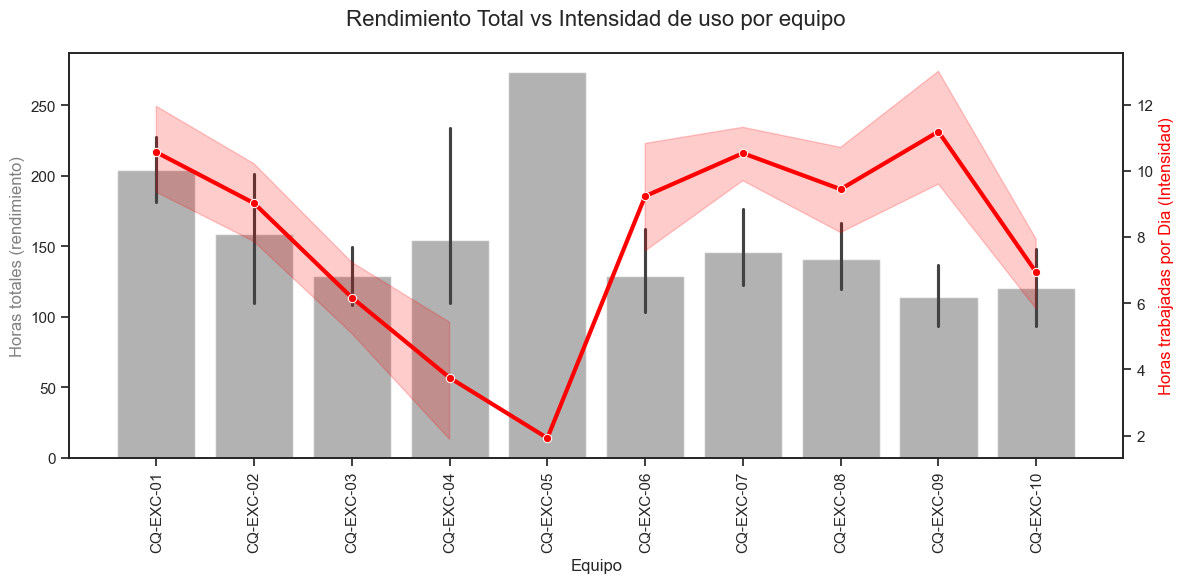


Matriz de correlacion
               Rendimiento  Costos_Hora  Intesidad_Uso
Rendimiento       1.000000    -0.058080      -0.098979
Costos_Hora      -0.058080     1.000000       0.232123
Intesidad_Uso    -0.098979     0.232123       1.000000


In [44]:
sns.set_theme(style="ticks")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficamos Rendimiento (Barras)
sns.barplot(data=df_puntas, x='Equipo', y='Rendimiento', alpha=0.6, ax=ax1, color='gray')

# Creamos un segundo eje Y para la Intensidad de Uso (Línea)
ax2 = ax1.twinx()
sns.lineplot(data=df_puntas, x='Equipo', y='Intesidad_Uso', marker='o', color='red', ax=ax2, linewidth=3)

ax1.set_title('Rendimiento Total vs Intensidad de uso por equipo', fontsize=16, pad=20)
ax1.set_ylabel('Horas totales (rendimiento)', color='gray')
ax1.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Horas trabajadas por Dia (Intensidad)', color='red')

plt.tight_layout()
plt.show()

correlacion = df_puntas[['Rendimiento', 'Costos_Hora', 'Intesidad_Uso']].corr()
print('\nMatriz de correlacion')
print(correlacion)